In [4]:
from unityagents import UnityEnvironment
from ddpg_agent import *
import matplotlib.pyplot as plt
%matplotlib inline

# Define the environment

In [5]:
env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]
num_agents = len(env_info.agents)
action_size = brain.vector_action_space_size
states = env_info.vector_observations
state_size = states.shape[1]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


# DDPG - algorithm

In [6]:
agent  = Agent(state_size, action_size, random_seed = 2, replicates = num_agents)

In [7]:
def ddpg(n_episodes=2000, max_t=1000, goal_score = 0.5, interval = 100):
    
    """Deep Deterministic Policy Gradients DDPG  from Pendulum exercise was employed: 
       Params:
            n_episodes (int): maximum number of training episodes
            max_t (int): maximum number of timesteps per episode
    """
    
    episode_scores_deque = deque(maxlen=interval)
    episode_scores = []
    avg_episode_scores = []
     
    for i_episode in range(1, n_episodes+1):
        
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agent.reset() 
        scores = np.zeros(num_agents)                 
                
        for t in range(max_t):
            
            actions = agent.act(states)            
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            agent.step(t, states, actions, rewards, next_states, dones)
            states  = next_states
            scores += rewards                                  # update the score (for each agent)
            if np.any(dones):                                  # exit loop if episode finished
                break

        episode_score = np.max(scores)
        episode_scores.append(episode_score)
        episode_scores_deque.append(episode_score)
        avg_episode_score = np.mean(episode_scores_deque)
        avg_episode_scores.append(avg_episode_score)
        
        print('\rEpisode {}\tEpisode score: {:.2f} \tAverage score: {:.2f}'.format(i_episode, episode_score, avg_episode_score), end="\n")   
        
        torch.save(agent.actor_local.state_dict(),  'checkpoint_actor.pth' )
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        
        if (i_episode > interval-1) & (avg_episode_score >= goal_score):
            print('\nEnvironment solved!')
            break
            
    return episode_scores, avg_episode_scores

In [8]:
episode_scores, avg_episode_scores = ddpg()

Episode 1	Episode score: 0.00 	Average score: 0.00
Episode 2	Episode score: 0.00 	Average score: 0.00
Episode 3	Episode score: 0.00 	Average score: 0.00
Episode 4	Episode score: 0.00 	Average score: 0.00
Episode 5	Episode score: 0.00 	Average score: 0.00
Episode 6	Episode score: 0.00 	Average score: 0.00
Episode 7	Episode score: 0.00 	Average score: 0.00
Episode 8	Episode score: 0.00 	Average score: 0.00
Episode 9	Episode score: 0.00 	Average score: 0.00
Episode 10	Episode score: 0.00 	Average score: 0.00
Episode 11	Episode score: 0.00 	Average score: 0.00
Episode 12	Episode score: 0.00 	Average score: 0.00
Episode 13	Episode score: 0.00 	Average score: 0.00
Episode 14	Episode score: 0.00 	Average score: 0.00
Episode 15	Episode score: 0.00 	Average score: 0.00
Episode 16	Episode score: 0.00 	Average score: 0.00
Episode 17	Episode score: 0.00 	Average score: 0.00
Episode 18	Episode score: 0.00 	Average score: 0.00
Episode 19	Episode score: 0.00 	Average score: 0.00
Episode 20	Episode sc

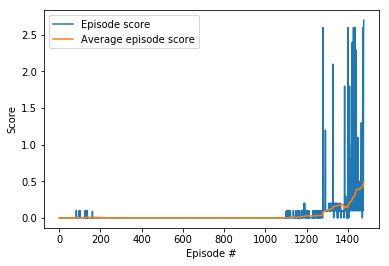

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(episode_scores)+1), episode_scores, label = "Episode score")
plt.plot(np.arange(1, len(avg_episode_scores)+1), avg_episode_scores, label = "Average episode score")
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend()
plt.show()

In [ ]:
env.close()